In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### This below dataset contains about 10 years of daily weather observations from many locations across Australia & based on this data we have to predict that whther it will rain or not tomorrow?

In [89]:
#Loading the training dataset
w_train = pd.read_csv('weatherAUS_train.csv')

In [90]:
#Overview of training dataset
w_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2013-07-22,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,...,54.0,28.0,1019.4,1016.3,2.0,2.0,12.2,16.6,No,0
1,2015-02-28,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,...,84.0,66.0,1008.1,1005.1,8.0,8.0,18.8,24.3,No,1
2,2009-11-18,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,...,68.0,91.0,1001.5,1000.1,7.0,8.0,20.1,16.5,Yes,1
3,2014-02-19,Richmond,19.9,26.4,0.0,2.8,NaN,SW,24.0,NNE,...,97.0,97.0,1004.6,1002.1,NaN,NaN,22.6,22.3,No,1
4,2015-10-04,Wollongong,19.3,32.9,0.0,NaN,NaN,W,48.0,NNW,...,46.0,15.0,1022.8,1020.7,NaN,NaN,22.1,32.6,No,0


Questions:
1) # of observations & columns in dataset?

2) Type of columns & their description?

3) To check for null/missing values & duplicates?

In [91]:
#get the total no of observations
len(w_train)

101822

In [92]:
#to know the column datatypes
w_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101822 entries, 0 to 101821
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           101822 non-null  object 
 1   Location       101822 non-null  object 
 2   MinTemp        100795 non-null  float64
 3   MaxTemp        100947 non-null  float64
 4   Rainfall       99522 non-null   float64
 5   Evaporation    57933 non-null   float64
 6   Sunshine       53022 non-null   float64
 7   WindGustDir    94504 non-null   object 
 8   WindGustSpeed  94550 non-null   float64
 9   WindDir9am     94431 non-null   object 
 10  WindDir3pm     98836 non-null   object 
 11  WindSpeed9am   100550 non-null  float64
 12  WindSpeed3pm   99663 non-null   float64
 13  Humidity9am    99968 non-null   float64
 14  Humidity3pm    98662 non-null   float64
 15  Pressure9am    91268 non-null   float64
 16  Pressure3pm    91304 non-null   float64
 17  Cloud9am       62833 non-null

In [93]:
#to check unique values
w_train.nunique()

Date             3408
Location           49
MinTemp           384
MaxTemp           497
Rainfall          597
Evaporation       320
Sunshine          144
WindGustDir        16
WindGustSpeed      66
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       43
Humidity9am       100
Humidity3pm       101
Pressure9am       540
Pressure3pm       532
Cloud9am           10
Cloud3pm           10
Temp9am           432
Temp3pm           496
RainToday           2
RainTomorrow        2
dtype: int64

In [94]:
# check the min & max date
w_train['Date'].agg (['min', 'max'])

min    2007-11-01
max    2017-06-25
Name: Date, dtype: object

In [95]:
# check for duplicacy for dates
w_train[['Date','Location']].duplicated().sum()

0

### No of Observations in dataset:

1) There are total 101822 no of observations & 23 columns.

### Columns Description:

1) Date (object-date_type) ---> contains the dates for the period from 1st-Nov-2007 to 25th-Jun-2017 (10 years).

2) Location (object) ---> specify the name of location of a particular weather station.

3) Min Temp (num) ---> The minimum temperature in degrees celsius on that particular date/day

4) Max Temp (num) ---> The minimum temperature in degrees celsius on that particular date/day

5) Rainfall (num) ---> The amount of rainfall recorded for the day in mm.

6) Evaporation (num) ---> Gives the Class A pan evaporation (mm) in the 24 hours duration (to 9am).

7) Sunshine (num) ---> No of hr for a bright sunlight in a day.

8) WindGustDir (obj) ---> The direction of the strongest wind gust in the 24 hours to midnight.

9) WindGustSpeed (num) ---> The speed (km/h) of the strongest wind gust in the 24 hours to midnight.

10) WindDir9am (obj) ---> The direction of wind at 9am.

11) WindDir3pm (obj) ---> The direction of wind at 3pm.

12) WindSpeed9am (num) ---> The speed of wind(km/hr) at 9am.

13) WindSpeed3pm (num) ---> The speed of wind(km/hr) at 3pm.

14) Humidity9am (num)  ---> The Humidity in percent at 9am.

15) Humidity3pm (num) ---> The Humidity in percent at 3pm.

16) Pressure9am (num) ---> Atmospheric pressure (hpa) reduced to mean sea level at 9am.

17) Pressure3pm (num) ---> Atmospheric pressure (hpa) reduced to mean sea level at 3pm.

18) Cloud9am (num)  ---> Fraction of sky obscured by cloud at 9am. This is measured in "oktas". An okta is a unit of measurement used to describe the amount of cloud cover at any given location such as a weather station.

19) Cloud3pm (num) ---> Fraction of sky on=bscure by cloud at 3 pm.

20) Temp9am (num) ---> Temperature (degrees C) at 9am.

21) Temp3pm (num) ---> Temperature (degrees C) at 3pm.

22) RainToday (Boolean-Yes/No) ---> Yes if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise No

23) RainTomorrow (Boolean) ---> 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.

### Duplicacy

In [96]:
# check for duplicate values
w_train.duplicated().sum()

0

There is no duplicate entries in the daatset.

### Null Values 

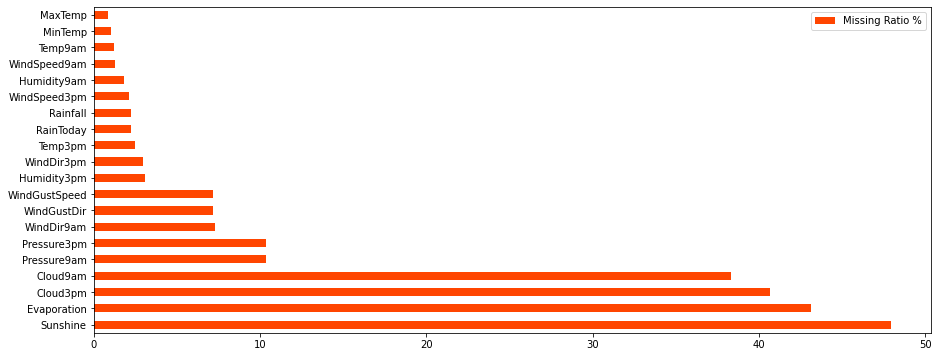

In [97]:
#Creating function for plotting % of null values:

def plot_null_values(data: pd.DataFrame):
    import matplotlib.pyplot as plt
    if data.isnull().sum().sum() != 0:
        Null_perc = (data.isnull().sum() / len(data)) * 100      
        Null_perc = Null_perc.drop(Null_perc[Null_perc == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :Null_perc})
        missing_data.plot(kind = "barh", figsize=(15,6), color='orangered')
        plt.show()
    else:
        print('No NAs/Null Values found')
plot_null_values(w_train)

THere are lot of null values in our datset & some variables contains more than 30% of null values.

As there are lot of NUll values in our dataset. We have to treat them as internal working of machine learning algorithms breaks down due to null or missing data.
One has to be carefull as treating null vlaues is a tricker task & one may loose important information ot introduce bias in the model.

#### There are multiple ways to treat the null values. Some of them which are commonly use are:
1) Deletion of data: 
   - Row Deletion-->If a particular observation contains more null values (high no of features as null vlaues), it's better     to delete it as it won't be able to learn/draw any specific insight from it.
   - Column Deletion--> If a column/feature contains generally more than 60% null vlaues, drop it.
   
2) Imputation of data: means trying to find a suitable substitute for missing data. Deletion of missing data might lead to loss of information if it is a critical feature or data set itself is very small. 
- Imputation can be done using:
    - mean (for symmetrical data)
    - median (for skewed data)
    - mode (for categorical/Discrete data)
    - Specific Value/one-hot encoding (for large # of missing values)

3) Predicting missing values: In this method we try to apply regression or classification techniques to come up with educated guesses of possible outcome to replace missing value. We have to be careful about not adding any extra bias from our predictive model itsel.

In [98]:
#Dropping null rows if all the columns are Null
w_train = w_train.dropna(axis=0,how='all')
len(w_train)

101822

In [99]:
#Dropping the rows if any row contain than more than 60% null values
w_train = w_train.dropna(axis=0,thresh=14)
len(w_train)

99643

In [100]:
#Dropping rows as per below condition 
# if we have all the wind details missing
w_train = w_train.loc[w_train.WindGustSpeed.notnull() | w_train.WindSpeed9am.notnull() | w_train.WindSpeed3pm.notnull()]
len(w_train)


99578

In [101]:
#Dropping rows as per below condition 
# if we have all the wind direction details missing
w_train = w_train.loc[w_train.WindGustDir.notnull() | w_train.WindDir9am.notnull() | w_train.WindDir3pm.notnull()]
len(w_train)

99343

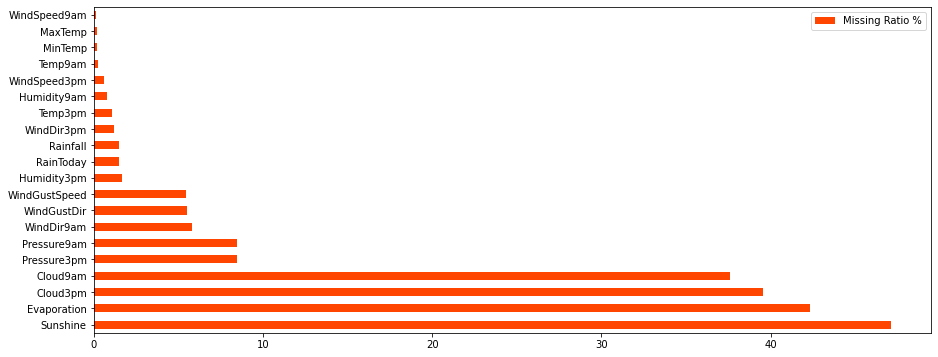

In [102]:
plot_null_values(w_train)

In [103]:
w_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99162.000000,99163.000000,97853.000000,57268.000000,52541.000000,93907.000000,99189.000000,98763.000000,98546.000000,97694.000000,90948.000000,90934.000000,61970.000000,60077.000000,99124.000000,98296.000000,99343.000000
mean,12.220927,23.251681,2.315653,5.469940,7.613412,40.007699,14.106514,18.709810,68.841658,51.495865,1017.648748,1015.257819,4.445990,4.507965,17.000357,21.699489,0.219512
std,6.387130,7.090323,8.150584,4.196556,3.769893,13.574158,8.855668,8.773456,19.003819,20.754798,7.121490,7.045064,2.882218,2.717279,6.486712,6.924716,0.413918
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.300000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.500000,0.000000
max,31.900000,48.100000,367.600000,145.000000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1038.500000,9.000000,9.000000,39.400000,46.100000,1.000000


#### Treating Null values

In [104]:
w_train.isna().sum()

Date                 0
Location             0
MinTemp            181
MaxTemp            180
Rainfall          1490
Evaporation      42075
Sunshine         46802
WindGustDir       5448
WindGustSpeed     5436
WindDir9am        5772
WindDir3pm        1183
WindSpeed9am       154
WindSpeed3pm       580
Humidity9am        797
Humidity3pm       1649
Pressure9am       8395
Pressure3pm       8409
Cloud9am         37373
Cloud3pm         39266
Temp9am            219
Temp3pm           1047
RainToday         1490
RainTomorrow         0
dtype: int64

In [105]:
len(w_train)

99343

In [106]:
#Dropping Rain Today col null values
w_train = w_train.loc[w_train.RainToday.notnull()]
w_train.isna().sum()


Date                 0
Location             0
MinTemp            131
MaxTemp            176
Rainfall             0
Evaporation      40858
Sunshine         45781
WindGustDir       5347
WindGustSpeed     5335
WindDir9am        5680
WindDir3pm        1174
WindSpeed9am       121
WindSpeed3pm       577
Humidity9am        772
Humidity3pm       1639
Pressure9am       8354
Pressure3pm       8369
Cloud9am         36360
Cloud3pm         38306
Temp9am            203
Temp3pm           1046
RainToday            0
RainTomorrow         0
dtype: int64

In [107]:
#Filling the missing values for categorical variables with mode
w_train['WindDir9am'] = w_train['WindDir9am'].fillna(w_train['WindDir9am'].mode()[0])
w_train['WindGustDir'] = w_train['WindGustDir'].fillna(w_train['WindGustDir'].mode()[0])
w_train['WindDir3pm'] = w_train['WindDir3pm'].fillna(w_train['WindDir3pm'].mode()[0])

In [108]:
# Sorting the dataset based on location & date in ascending order
# convert to date if it was in str format
#data['Date'] = pd.to_datetime(data['Date'])
w_train = w_train.sort_values(['Location', 'Date'], ascending=(True, True))


In [109]:
# As it's a weather time series data it's better to fill the null values with the previous day values & 
#data doesn't change much in a day
for columns in w_train:
    w_train[columns] = w_train[columns].fillna(method = 'ffill')
print(w_train.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 97853 entries, 8439 to 57458
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           97853 non-null  object 
 1   Location       97853 non-null  object 
 2   MinTemp        97853 non-null  float64
 3   MaxTemp        97853 non-null  float64
 4   Rainfall       97853 non-null  float64
 5   Evaporation    97853 non-null  float64
 6   Sunshine       97853 non-null  float64
 7   WindGustDir    97853 non-null  object 
 8   WindGustSpeed  97853 non-null  float64
 9   WindDir9am     97853 non-null  object 
 10  WindDir3pm     97853 non-null  object 
 11  WindSpeed9am   97853 non-null  float64
 12  WindSpeed3pm   97853 non-null  float64
 13  Humidity9am    97853 non-null  float64
 14  Humidity3pm    97853 non-null  float64
 15  Pressure9am    97853 non-null  float64
 16  Pressure3pm    97853 non-null  float64
 17  Cloud9am       95711 non-null  float64
 18  Clo

In [110]:
w_train['Cloud9am'] = w_train['Cloud9am'].fillna(w_train['Cloud9am'].mean())
w_train['Cloud3pm'] = w_train['Cloud3pm'].fillna(w_train['Cloud3pm'].mean())
print(w_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97853 entries, 8439 to 57458
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           97853 non-null  object 
 1   Location       97853 non-null  object 
 2   MinTemp        97853 non-null  float64
 3   MaxTemp        97853 non-null  float64
 4   Rainfall       97853 non-null  float64
 5   Evaporation    97853 non-null  float64
 6   Sunshine       97853 non-null  float64
 7   WindGustDir    97853 non-null  object 
 8   WindGustSpeed  97853 non-null  float64
 9   WindDir9am     97853 non-null  object 
 10  WindDir3pm     97853 non-null  object 
 11  WindSpeed9am   97853 non-null  float64
 12  WindSpeed3pm   97853 non-null  float64
 13  Humidity9am    97853 non-null  float64
 14  Humidity3pm    97853 non-null  float64
 15  Pressure9am    97853 non-null  float64
 16  Pressure3pm    97853 non-null  float64
 17  Cloud9am       97853 non-null  float64
 18  Clo

##### Now we have treated all the null values in the dataset & this data can be used for further analytics

In [111]:
#Changing RainToday data type to numeric
w_train['RainToday'] = w_train['RainToday'].map({'Yes': 1, 'No': 0})

#### Assumptions
1) For more cloud cover there are possibility of rain.

2) High Temp will lead to high Evaporation & High Evaporation lead less humiidity.

3) Temp should not have any significant effect on rainfall.

4) Higher the rainfall today, more the chances of rain for tomorrow.

5) Less Sunshine might lead to rainfall.

#### To check the count of Rain yes & no for Today & tomorrow rainfall

In [112]:
w_train['RainTomorrow'].value_counts()

#its a imbalanced data

0    76450
1    21403
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

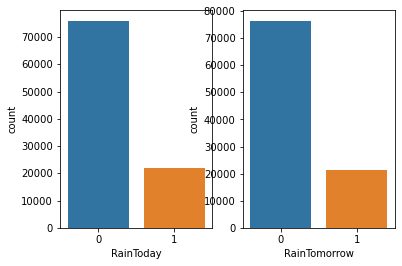

In [113]:
fig,ax =plt.subplots(1,2)
sns.countplot(data=w_train,x='RainToday',ax=ax[0])
sns.countplot(data=w_train,x='RainTomorrow',ax=ax[1])

The dataset is clearly imbalanced for response variable i.e. Rain Tomorrow:(0:77536 & 1:21807)

#### To check the count of Wind Direction Categorical data

In [114]:
w_train['WindDir9am'].value_counts(),w_train['WindDir3pm'].value_counts(),w_train['WindGustDir'].value_counts()

(N      13708
 SE      6412
 E       6318
 SSE     6237
 S       6023
 NW      5930
 W       5746
 SW      5672
 NNE     5496
 NNW     5467
 ESE     5328
 ENE     5325
 SSW     5188
 NE      5136
 WNW     5062
 WSW     4805
 Name: WindDir9am, dtype: int64,
 SE     8663
 W      6870
 S      6690
 WSW    6476
 SW     6416
 SSE    6388
 WNW    6131
 N      6016
 NW     5947
 ESE    5897
 E      5796
 NE     5722
 SSW    5573
 NNW    5398
 ENE    5332
 NNE    4538
 Name: WindDir3pm, dtype: int64,
 W      12178
 SE      6509
 N       6315
 E       6306
 SSE     6296
 WSW     6209
 S       6179
 SW      6093
 SSW     6009
 WNW     5665
 NW      5582
 ENE     5558
 ESE     5042
 NE      4885
 NNW     4541
 NNE     4486
 Name: WindGustDir, dtype: int64)

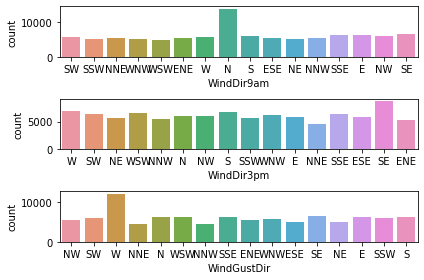

In [115]:
fig, ax =plt.subplots(3,1)
sns.countplot(data=w_train,x='WindDir9am',ax=ax[0])
sns.countplot(data=w_train,x='WindDir3pm',ax=ax[1])
sns.countplot(data=w_train,x='WindGustDir',ax=ax[2])
fig.tight_layout()

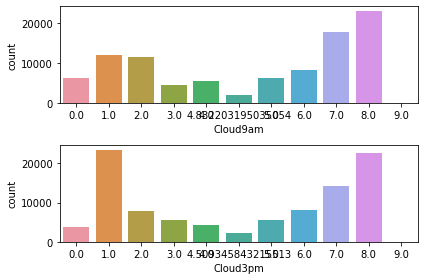

In [116]:
#Ploting cloud data
fig,ax =plt.subplots(2,1)
sns.countplot(data=w_train,x='Cloud9am',ax=ax[0])
sns.countplot(data=w_train,x='Cloud3pm',ax=ax[1])
fig.tight_layout()

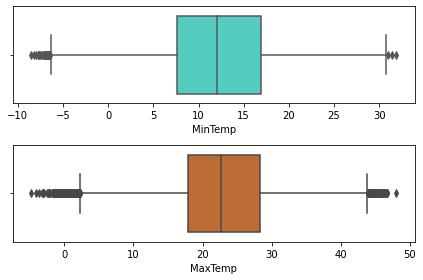

In [117]:
#Ploting min & max temp data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='MinTemp',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='MaxTemp',ax=ax[1],color='chocolate')
fig.tight_layout()

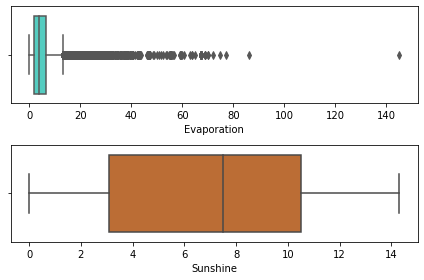

In [118]:
#Ploting Evaporation & Sunshine data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='Evaporation',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='Sunshine',ax=ax[1],color='chocolate')
fig.tight_layout()

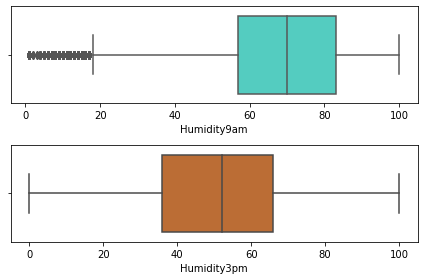

In [119]:
#Ploting Humidity Data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='Humidity9am',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='Humidity3pm',ax=ax[1],color='chocolate')
fig.tight_layout()

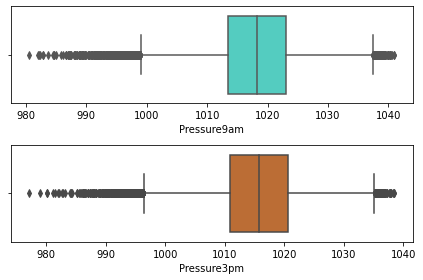

In [120]:
#Ploting Pressure data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='Pressure9am',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='Pressure3pm',ax=ax[1],color='chocolate')
fig.tight_layout()

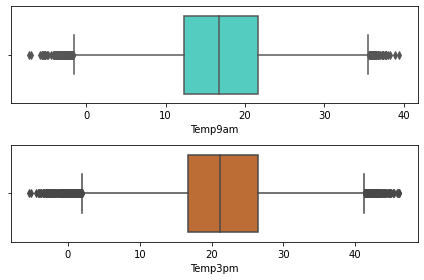

In [121]:
#Ploting Temp data
fig,ax =plt.subplots(2,1)
sns.boxplot(data=w_train,x='Temp9am',ax=ax[0],color='turquoise')
sns.boxplot(data=w_train,x='Temp3pm',ax=ax[1],color='chocolate')
fig.tight_layout()

#### Analysing Numerical Features

In [122]:
#lets get the list of Nuemrical feature column list
num_cols = w_train.select_dtypes('number').columns.to_list()
print(num_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


<AxesSubplot:>

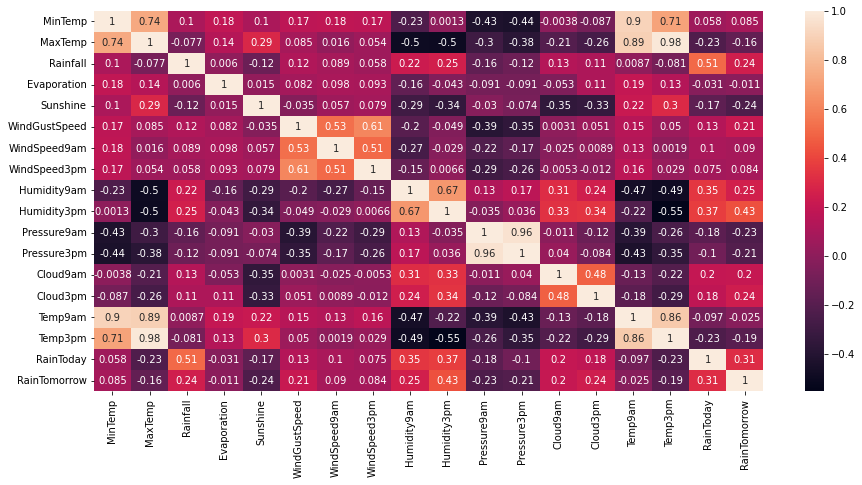

In [123]:
#ploting heatmap for getting correlation
plt.figure(figsize=(15,7))
sns.heatmap(w_train[num_cols].corr(), annot=True)

In [124]:
# to get the num variables who are having high correlation
threshold=0.60
corr_col=[]
for i in num_cols:
    for j in num_cols:
        if i == j:
            continue
        if w_train[[i,j]].corr()[i][1] >= threshold:
            print("{} is highly coorelated with {} at {:.2f}".format(i,j,w_train[[i,j]].corr()[i][1] ))
            

MinTemp is highly coorelated with MaxTemp at 0.74
MinTemp is highly coorelated with Temp9am at 0.90
MinTemp is highly coorelated with Temp3pm at 0.71
MaxTemp is highly coorelated with MinTemp at 0.74
MaxTemp is highly coorelated with Temp9am at 0.89
MaxTemp is highly coorelated with Temp3pm at 0.98
WindGustSpeed is highly coorelated with WindSpeed3pm at 0.61
WindSpeed3pm is highly coorelated with WindGustSpeed at 0.61
Humidity9am is highly coorelated with Humidity3pm at 0.67
Humidity3pm is highly coorelated with Humidity9am at 0.67
Pressure9am is highly coorelated with Pressure3pm at 0.96
Pressure3pm is highly coorelated with Pressure9am at 0.96
Temp9am is highly coorelated with MinTemp at 0.90
Temp9am is highly coorelated with MaxTemp at 0.89
Temp9am is highly coorelated with Temp3pm at 0.86
Temp3pm is highly coorelated with MinTemp at 0.71
Temp3pm is highly coorelated with MaxTemp at 0.98
Temp3pm is highly coorelated with Temp9am at 0.86


As we are using only Decison tree model for this dataset. It's not necessary to treat the outliers & multicollinearity between independent variable. Hencce we will proceed for training now.

In [125]:
#from sklearn import preprocessing
#W_train=w_train.copy()

le = preprocessing.LabelEncoder()
W_train['Location'] = le.fit_transform(W_train['Location'])
W_train['WindDir9am'] = le.fit_transform(W_train['WindDir9am'])
W_train['WindDir3pm'] = le.fit_transform(W_train['WindDir3pm'])
W_train['WindGustDir'] = le.fit_transform(W_train['WindGustDir'])

In [136]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score

In [137]:
W_train = w_train.drop(['Date'],axis=1)
W_train = pd.get_dummies(W_train)
W_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
8439,8.8,15.7,5.0,1.6,2.6,48.0,13.0,15.0,92.0,67.0,...,0,0,0,0,0,0,0,1,0,0
629,12.7,15.8,0.8,1.4,7.8,35.0,13.0,15.0,75.0,52.0,...,0,0,0,0,0,0,1,0,0,0
25669,6.2,15.1,0.0,1.8,2.1,20.0,2.0,11.0,81.0,56.0,...,0,0,0,0,0,0,1,0,0,0
71740,5.3,15.9,0.0,1.4,8.0,30.0,6.0,13.0,71.0,46.0,...,0,0,0,0,0,0,0,0,0,0
94710,9.8,15.4,0.0,1.4,0.9,30.0,9.0,9.0,56.0,67.0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
x_train = W_train.drop(['RainTomorrow'],axis=1)
y_train = W_train["RainTomorrow"]
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
8439,8.8,15.7,5.0,1.6,2.6,48.0,13.0,15.0,92.0,67.0,...,0,0,0,0,0,0,0,1,0,0
629,12.7,15.8,0.8,1.4,7.8,35.0,13.0,15.0,75.0,52.0,...,0,0,0,0,0,0,1,0,0,0
25669,6.2,15.1,0.0,1.8,2.1,20.0,2.0,11.0,81.0,56.0,...,0,0,0,0,0,0,1,0,0,0
71740,5.3,15.9,0.0,1.4,8.0,30.0,6.0,13.0,71.0,46.0,...,0,0,0,0,0,0,0,0,0,0
94710,9.8,15.4,0.0,1.4,0.9,30.0,9.0,9.0,56.0,67.0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# splitting the train data into train & validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size =0.25, random_state=50)

In [140]:
x_train.columns[x_train.isna().sum()>0]

Index([], dtype='object')

In [141]:
#to balance the training dataset 
os = SMOTE(random_state=50) #defined random state
x_train, y_train = os.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count)

Counter({1: 57370, 0: 57370})


## Model 1
### Decision Tree (with default hyperparameters)

In [142]:
# define model
model = DecisionTreeClassifier()
# fit model on training data
model.fit(x_train, y_train)
# prediction of y on validation data
y_pred = model.predict(x_valid)
y_train_pred=model.predict(x_train)

In [143]:
#generate classification report on training data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57370
           1       1.00      1.00      1.00     57370

    accuracy                           1.00    114740
   macro avg       1.00      1.00      1.00    114740
weighted avg       1.00      1.00      1.00    114740



In [144]:
#generate classification report on validation data
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     19080
           1       0.49      0.55      0.52      5384

    accuracy                           0.78     24464
   macro avg       0.68      0.69      0.69     24464
weighted avg       0.79      0.78      0.78     24464



Note: you may need to restart the kernel to use updated packages.


### Model1.1
### Hyper-Parameters Tunning

In [154]:
from sklearn.metrics import f1_score 

Depth = np.arange(1,20)
f1_sc = []
for d in Depth:
    # define parameters
    model = DecisionTreeClassifier(criterion = "gini", max_depth=d)
    # fit model on training data
    model.fit(x_train, y_train)
    # prediction of y on validation data
    y_pred = model.predict(x_valid)
    y_train_pred=model.predict(x_train)
    
    f1_sc.append(sklearn.metrics.f1_score(y_valid, y_pred))

print (f1_sc)
print (max(f1_sc))

NameError: name 'sklearn' is not defined

In [149]:
#verifying
# define parameters
model = DecisionTreeClassifier(criterion = "gini", max_depth=9)
# fit model on training data
model.fit(x_train, y_train)
# prediction of y on validation data
y_pred = model.predict(x_valid)
y_train_pred=model.predict(x_train)
#Calcultaing f1 score
f1_score =  sklearn.metrics.f1_score(y_valid, y_pred)

print (f1_score)

NameError: name 'sklearn' is not defined

In [134]:
#for depth =9, we get max f1_score of 0.578
#now let's tune max_sample_leaf
# define parameters
model = DecisionTreeClassifier(criterion = "gini", max_depth=9, min_samples_leaf = 300)
# fit model on training data
model.fit(x_train, y_train)
# prediction of y on validation data
y_pred = model.predict(x_valid)
y_train_pred=model.predict(x_train)
#Calcultaing f1 score
f1_score =  sklearn.metrics.f1_score(y_valid, y_pred)

print (f1_score)

0.5871453387376954


In [135]:
# Best Hyperparameters are depth =9 & min_samples_leaf = 300
print("F1_score: ",f1_score)

F1_score:  0.5871453387376954


In [155]:
#generate classification report on training data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75     57370
           1       0.78      0.62      0.69     57370

    accuracy                           0.72    114740
   macro avg       0.73      0.72      0.72    114740
weighted avg       0.73      0.72      0.72    114740



In [156]:
#generate classification report on validation data
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86     19080
           1       0.50      0.61      0.55      5384

    accuracy                           0.78     24464
   macro avg       0.69      0.72      0.71     24464
weighted avg       0.80      0.78      0.79     24464



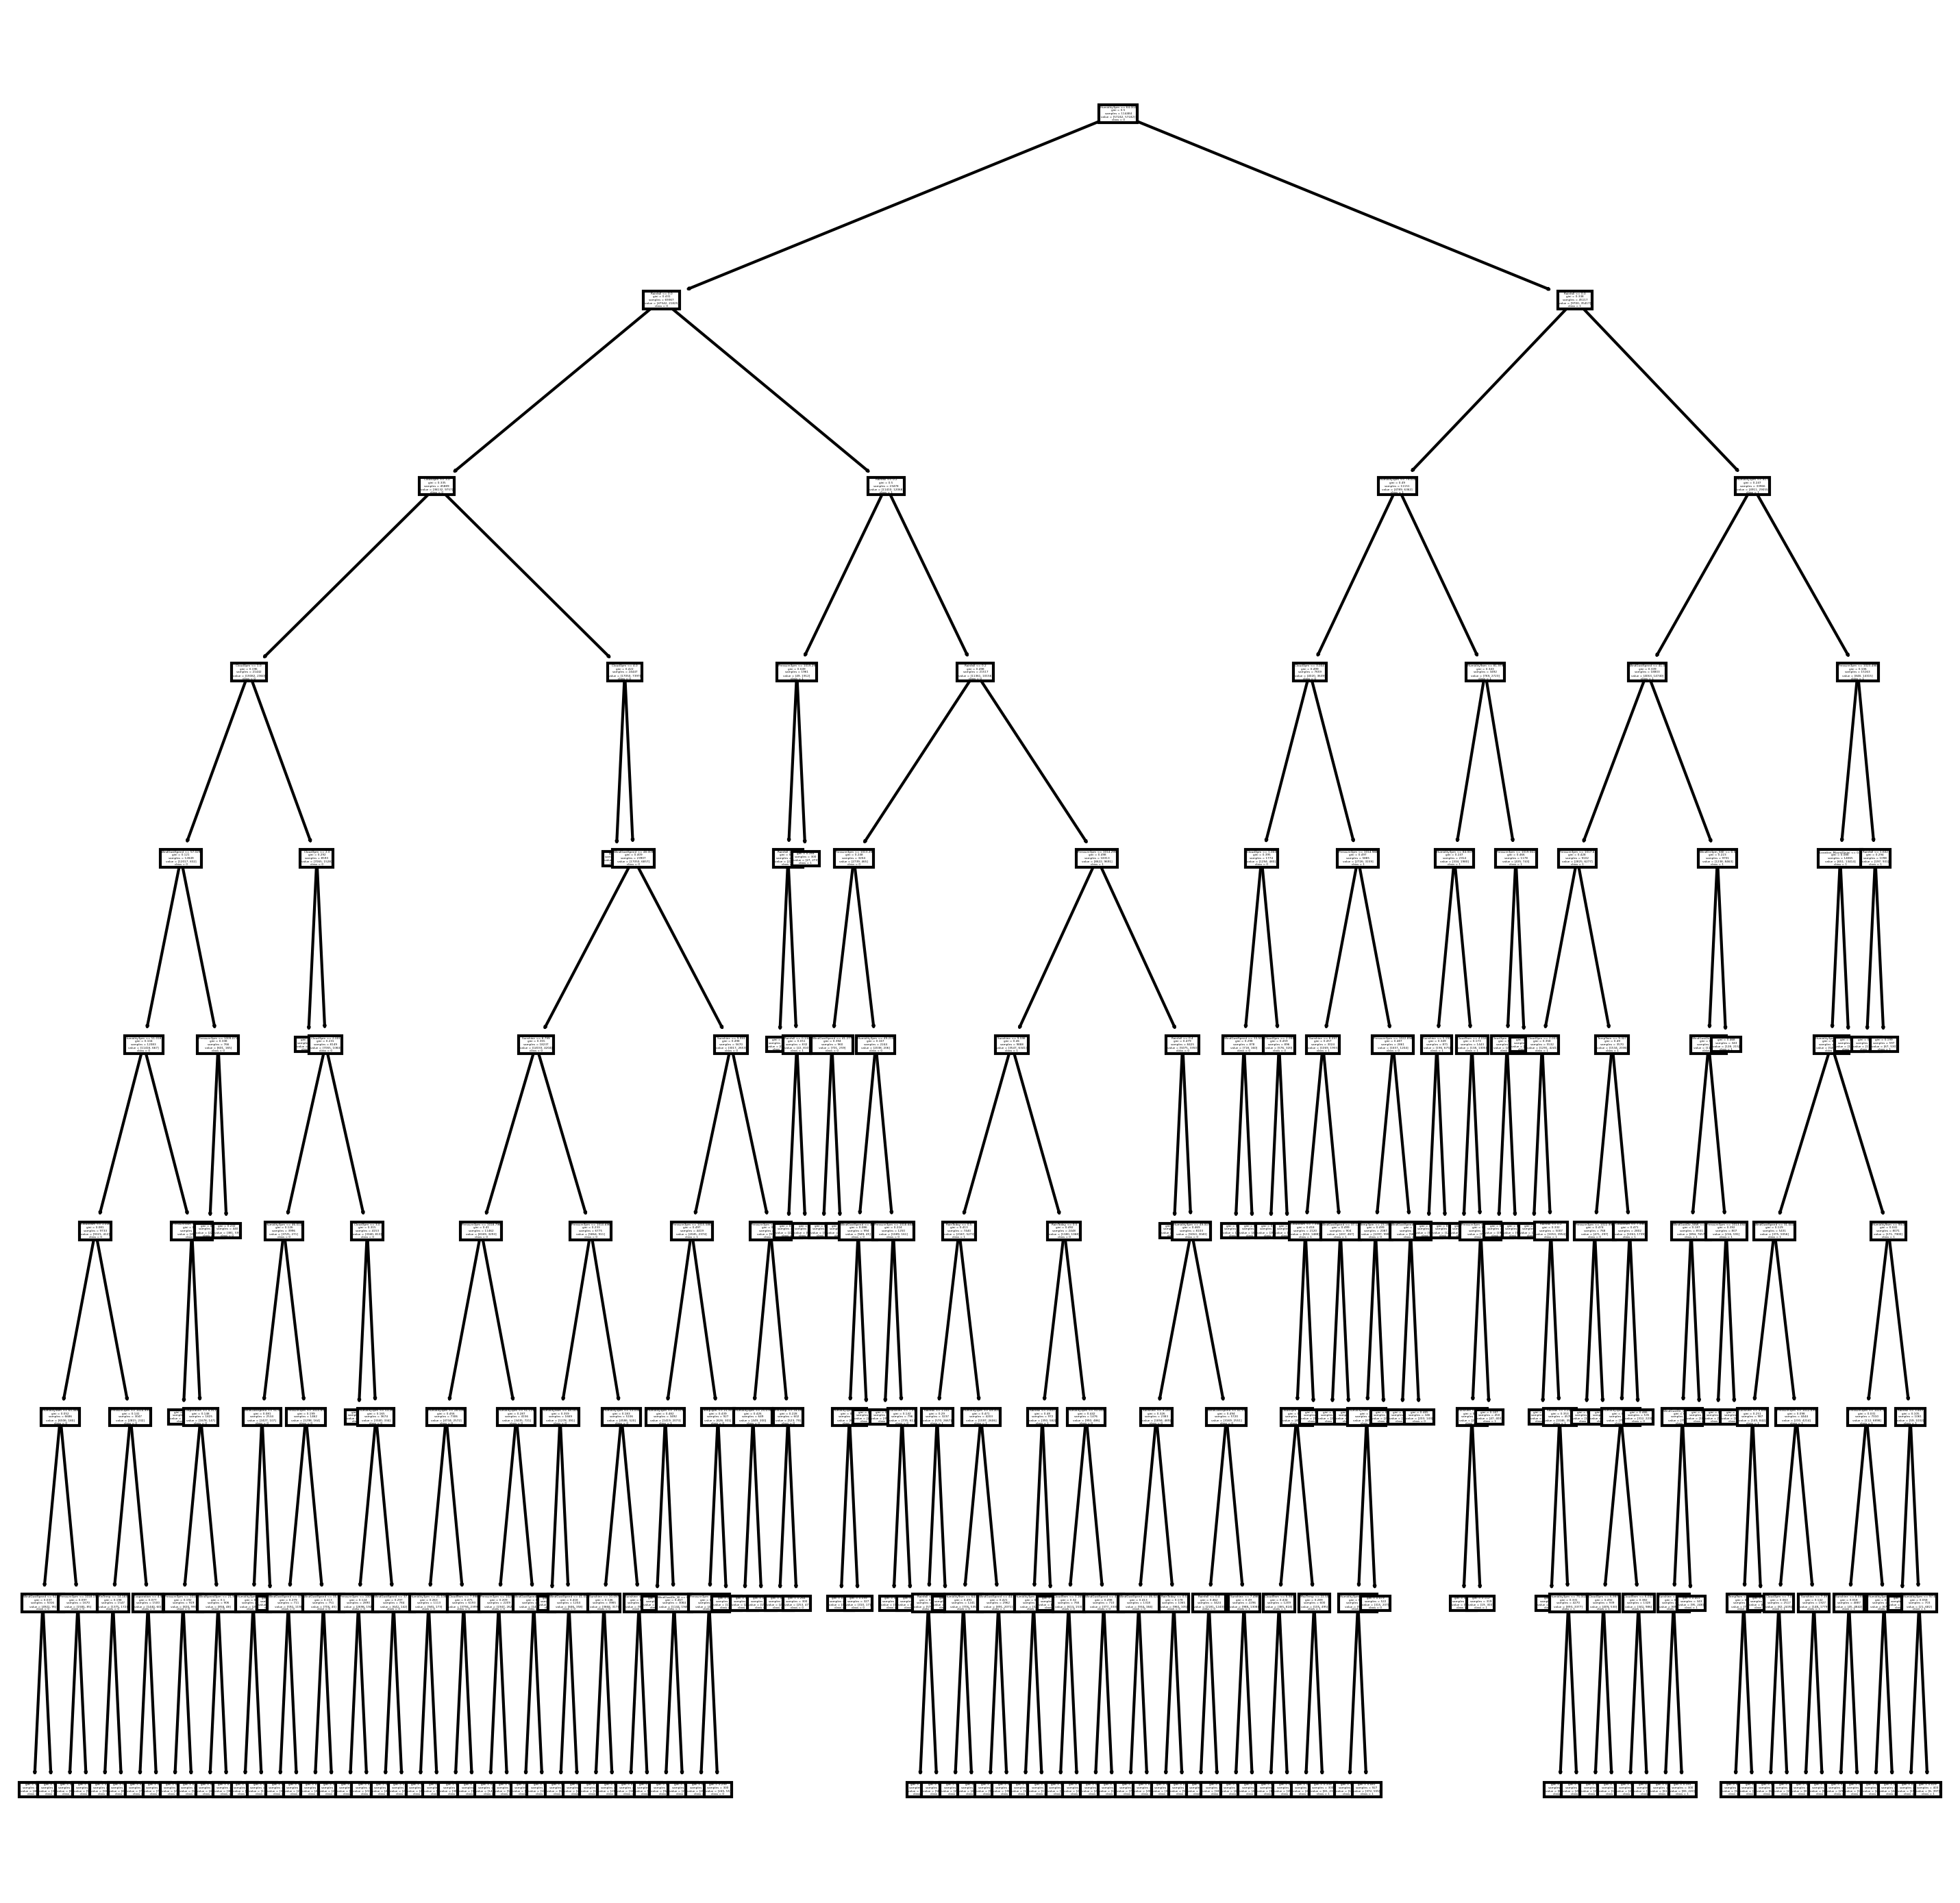

In [138]:
#Plotting the Decision Tree
fig, axes = plt.subplots(figsize=(12,12), dpi=300)
tree.plot_tree(model,feature_names= x_train.columns,
               class_names=["0","1"],
               filled = False)
plt.show()

### Model-2
### Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

In [172]:
#model fitting
rf = RandomForestClassifier()

In [173]:
#fitting model
rf.fit(x_train, y_train)

RandomForestClassifier()

In [174]:
#Calculating error metric on validation
y_pred = rf.predict(x_valid)

print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     19080
           1       0.70      0.59      0.64      5384

    accuracy                           0.86     24464
   macro avg       0.80      0.76      0.78     24464
weighted avg       0.85      0.86      0.85     24464



In [175]:
#Calculating error metric on train data
y_t_pred = rf.predict(x_train)
print(classification_report(y_train,y_t_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57370
           1       1.00      1.00      1.00     57370

    accuracy                           1.00    114740
   macro avg       1.00      1.00      1.00    114740
weighted avg       1.00      1.00      1.00    114740



In [176]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_valid, y_pred)
auc

0.760577929481249

### Model 2.1
#### Random Forest-Hyperparameters tunnig

In [164]:
#using Grid search Technique for getting best hyperparameters

n_estimators = [50,80,100]                     #no of trees
max_depth = [3,4,5,6,7,8,9]                   #max no of level
min_samples_leaf = [100,200,250,300]             #min no of sample in leaf
max_features = ['auto', 0.5]                          


In [165]:
param_dist = {'n_estimators': n_estimators,
              'max_depth':max_depth,
              'min_samples_leaf':min_samples_leaf,
             'max_features': max_features}
param_dist
              

{'n_estimators': [50, 80, 100],
 'max_depth': [3, 4, 5, 6, 7, 8, 9],
 'min_samples_leaf': [100, 200, 250, 300],
 'max_features': ['auto', 0.5]}

In [166]:
#model fitting
RF = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = RF, param_grid = param_dist, cv = 3, verbose =2, n_jobs=2) 

In [170]:
grid_search = grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_

In [93]:
#results on validation data
y_pred = grid_search.predict(x_valid)

print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     19208
           1       0.54      0.69      0.60      5256

    accuracy                           0.80     24464
   macro avg       0.72      0.76      0.74     24464
weighted avg       0.83      0.80      0.81     24464



In [96]:
#results on training data
y_t_pred = grid_search.predict(x_train)
print(classification_report(y_train,y_t_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     57242
           1       0.84      0.82      0.83     57242

    accuracy                           0.83    114484
   macro avg       0.83      0.83      0.83    114484
weighted avg       0.83      0.83      0.83    114484



In [97]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train,y_t_pred)
auc

0.8324569372139339

In [98]:
#AUC on validation 
auc = roc_auc_score(y_valid,y_pred)
auc

0.7639103633252761

In [143]:
len(W_train.columns)

115

### Model-3 (Logistic Base Model)

In [177]:
x_train = W_train.drop(['RainTomorrow'],axis=1)
y_train = W_train['RainTomorrow']

In [178]:
# splitting the train data into train & validation
from random import sample
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size =0.25, random_state=50)

#to balance the training dataset 
os = SMOTE(random_state=50)
x_train, y_train = os.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count)

Counter({1: 57370, 0: 57370})


In [179]:
#importing model
import statsmodels.api as sm
x_t= sm.add_constant(x_train)
model = sm.Logit(y_train,x_t)
result = model.fit(method='newton')
result.summary()

C:\Users\AKSHAY LATHWAL\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


         Current function value: 0.225675
         Iterations: 35


C:\Users\AKSHAY LATHWAL\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               114740
Model:                          Logit   Df Residuals:                   114625
Method:                           MLE   Df Model:                          114
Date:                Mon, 20 Jun 2022   Pseudo R-squ.:                  0.6744
Time:                        00:47:17   Log-Likelihood:                -25894.
converged:                      False   LL-Null:                       -79532.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       130.4849   4087.136      0.032      0.975   -7880.155    8141.125
MinTemp                       0.0490      0.006      7.876      0.000       0.037       0.061
MaxTemp                      -0.0285      0.009     -3.012      0.003      -0.047      -0.010
Rainfall                      0.0111      0.002      6.992      0.000       0.008       0.014
Evaporation                  -0.0008      0.004     -0.217      0.828      -0.008       0.006
Sunshine                     -0.1048      0.005    -20.179      0.000      -0.115      -0.095
WindGustSpeed                 0.0517      0.001     40.265      0.000       0.049       0.054
WindSpeed9am                 -0.0062      0.002     -3.453      0.001      -0.010      -0.003
WindSpeed3pm                 -0.0172      0.002     -9.649      0.000      -0.021      -0.014
Humidity9am                   0.0023      0.001      1.832      0.067      -0.000       0.005
Humidity3pm                   0.0531      0.001     41.135      0.000       0.051       0.056
Pressure9am                   0.1526      0.007     20.392      0.000       0.138       0.167
Pressure3pm                  -0.2088      0.008    -27.726      0.000      -0.224      -0.194
Cloud9am                      0.0029      0.006      0.449      0.653      -0.010       0.016
Cloud3pm                      0.1065      0.007     15.693      0.000       0.093       0.120
Temp9am                       0.0233      0.009      2.482      0.013       0.005       0.042
Temp3pm                      -0.0292      0.010     -2.922      0.003      -0.049      -0.010
RainToday                     0.4705      0.031     15.412      0.000       0.411       0.530
Location_Adelaide           -13.3465     34.367     -0.388      0.698     -80.704      54.011
Location_Albany             -13.3157     34.367     -0.387      0.698     -80.673      54.041
Location_Albury             -14.1077     34.367     -0.411      0.681     -81.465      53.250
Location_AliceSprings       -14.0329     34.367     -0.408      0.683     -81.390      53.325
Location_BadgerysCreek      -12.9569     34.367     -0.377      0.706     -80.314      54.400
Location_Ballarat           -13.8988     34.367     -0.404      0.686     -81.256      53.458
Location_Bendigo            -13.4244     34.367     -0.391      0.696     -80.782      53.933
Location_Brisbane           -13.6317     34.367     -0.397      0.692     -80.989      53.725
Location_Cairns             -14.0457     34.367     -0.409      0.683     -81.403      53.311
Location_Canberra           -14.3495     34.367     -0.418      0.676     -81.707      53.008
Location_Cobar              -14.2023     34.367     -0.413      0.679     -81.560      53.155
Location_CoffsHarbour       -14.1819     34.367     -0.413      0.680     -81.539      53.175
Location_Dartmoor           -14.2027     34.367     -0.413      0.679     -81.560      53.154
Location_Darwin             -14.4598     34.3

In [182]:
#prediction on validation data
x_v= sm.add_constant(x_valid)
y_pred = result.predict(x_v)
y_pred = list(y_pred)

C:\Users\AKSHAY LATHWAL\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [184]:
y_p=[]
for i in range(0,len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
    y_p.append(y_pred)

In [ ]:
y_p

In [185]:
#Model report
print(classification_report(y_valid,y_p))

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

### Model3.1 (Logistic-removing multicollinearity)

In [147]:
def iv_woe(data, target, bins=10, show_woe=False):
    c=[]
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        if d['IV'].sum()<0.03:
            c.append(ivars)
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
        
    return c,newDF, woeDF

In [148]:
iv_woe(W_train, 'RainTomorrow' , bins=10, show_woe=False)

Information value of MinTemp is 0.061435
Information value of MaxTemp is 0.153377
Information value of Rainfall is 0.598191
Information value of Evaporation is 0.066094
Information value of Sunshine is 0.478937
Information value of WindGustSpeed is 0.264563
Information value of WindSpeed9am is 0.041641
Information value of WindSpeed3pm is 0.04675
Information value of Humidity9am is 0.442886
Information value of Humidity3pm is 1.316497
Information value of Pressure9am is 0.306233
Information value of Pressure3pm is 0.261877
Information value of Cloud9am is 0.319523
Information value of Cloud3pm is 0.450864
Information value of Temp9am is 0.012867
Information value of Temp3pm is 0.222752
Information value of RainToday is 0.493945
Information value of Location_Adelaide is 7e-06
Information value of Location_Albany is 0.004623
Information value of Location_Albury is 1.6e-05
Information value of Location_AliceSprings is 0.020116
Information value of Location_BadgerysCreek is 0.000288
Inform

(['Temp9am',
  'Location_Adelaide',
  'Location_Albany',
  'Location_Albury',
  'Location_AliceSprings',
  'Location_BadgerysCreek',
  'Location_Ballarat',
  'Location_Bendigo',
  'Location_Brisbane',
  'Location_Cairns',
  'Location_Canberra',
  'Location_Cobar',
  'Location_CoffsHarbour',
  'Location_Dartmoor',
  'Location_Darwin',
  'Location_GoldCoast',
  'Location_Hobart',
  'Location_Katherine',
  'Location_Launceston',
  'Location_Melbourne',
  'Location_MelbourneAirport',
  'Location_Mildura',
  'Location_Moree',
  'Location_MountGambier',
  'Location_MountGinini',
  'Location_Newcastle',
  'Location_Nhil',
  'Location_NorahHead',
  'Location_NorfolkIsland',
  'Location_Nuriootpa',
  'Location_PearceRAAF',
  'Location_Penrith',
  'Location_Perth',
  'Location_PerthAirport',
  'Location_Portland',
  'Location_Richmond',
  'Location_Sale',
  'Location_SalmonGums',
  'Location_Sydney',
  'Location_SydneyAirport',
  'Location_Townsville',
  'Location_Tuggeranong',
  'Location_Uluru

In [191]:
X_train = W_train.drop(['RainTomorrow'],axis=1)
Y_train = W_train['RainTomorrow']
X_train = X_train.drop(['Temp9am',
  'Location_Adelaide',
  'Location_Albany',
  'Location_Albury',
  'Location_AliceSprings',
  'Location_BadgerysCreek',
  'Location_Ballarat',
  'Location_Bendigo',
  'Location_Brisbane',
  'Location_Cairns',
  'Location_Canberra',
  'Location_Cobar',
  'Location_CoffsHarbour',
  'Location_Dartmoor',
  'Location_Darwin',
  'Location_GoldCoast',
  'Location_Hobart',
  'Location_Katherine',
  'Location_Launceston',
  'Location_Melbourne',
  'Location_MelbourneAirport',
  'Location_Mildura',
  'Location_Moree',
  'Location_MountGambier',
  'Location_MountGinini',
  'Location_Newcastle',
  'Location_Nhil',
  'Location_NorahHead',
  'Location_NorfolkIsland',
  'Location_Nuriootpa',
  'Location_PearceRAAF',
  'Location_Penrith',
  'Location_Perth',
  'Location_PerthAirport',
  'Location_Portland',
  'Location_Richmond',
  'Location_Sale',
  'Location_SalmonGums',
  'Location_Sydney',
  'Location_SydneyAirport',
  'Location_Townsville',
  'Location_Tuggeranong',
  'Location_Uluru',
  'Location_WaggaWagga',
  'Location_Walpole',
  'Location_Watsonia',
  'Location_Williamtown',
  'Location_Witchcliffe',
  'Location_Wollongong',
  'Location_Woomera',
  'WindGustDir_E',
  'WindGustDir_ENE',
  'WindGustDir_ESE',
  'WindGustDir_N',
  'WindGustDir_NE',
  'WindGustDir_NNE',
  'WindGustDir_NNW',
  'WindGustDir_NW',
  'WindGustDir_S',
  'WindGustDir_SE',
  'WindGustDir_SSE',
  'WindGustDir_SSW',
  'WindGustDir_SW',
  'WindGustDir_W',
  'WindGustDir_WNW',
  'WindGustDir_WSW',
  'WindDir9am_E',
  'WindDir9am_ENE',
  'WindDir9am_ESE',
  'WindDir9am_N',
  'WindDir9am_NE',
  'WindDir9am_NNE',
  'WindDir9am_NNW',
  'WindDir9am_NW',
  'WindDir9am_S',
  'WindDir9am_SE',
  'WindDir9am_SSE',
  'WindDir9am_SSW',
  'WindDir9am_SW',
  'WindDir9am_W',
  'WindDir9am_WNW',
  'WindDir9am_WSW',
  'WindDir3pm_E',
  'WindDir3pm_ENE',
  'WindDir3pm_ESE',
  'WindDir3pm_N',
  'WindDir3pm_NE',
  'WindDir3pm_NNE',
  'WindDir3pm_NNW',
  'WindDir3pm_NW',
  'WindDir3pm_S',
  'WindDir3pm_SE',
  'WindDir3pm_SSE',
  'WindDir3pm_SSW',
  'WindDir3pm_SW',
  'WindDir3pm_W',
  'WindDir3pm_WNW',
  'WindDir3pm_WSW'],axis=1)


# splitting the train data into train & validation
from random import sample
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size =0.25, random_state=50)

#to balance the training dataset 
os = SMOTE(random_state=50)
x_train, y_train = os.fit_resample(x_train, y_train)
count = Counter(y_train)
print(count)

In [193]:
x_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [194]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('RainTomorrow ~  MaxTemp+ Rainfall+ Evaporation+ Sunshine+ WindGustSpeed+WindSpeed9am+ WindSpeed3pm+ Humidity9am+ Humidity3pm+Pressure9am+Pressure3pm+Cloud9am+Cloud3pm+Temp3pm+RainToday+MinTemp', data=pd.concat([x_train,y_train],axis=1), return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,30970.055424,Intercept
1,23.291744,MaxTemp
2,1.421272,Rainfall
3,1.432970,Evaporation
4,1.769435,Sunshine
5,2.398749,WindGustSpeed
6,1.885467,WindSpeed9am
7,1.953216,WindSpeed3pm
8,2.553583,Humidity9am
9,4.514834,Humidity3pm


In [195]:
x_train=x_train.drop(['MaxTemp','Pressure3pm','MinTemp','Humidity9am'],axis=1)

In [196]:
x_valid=x_valid.drop(['MaxTemp','Pressure3pm','MinTemp','Humidity9am'],axis=1)

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [198]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(x_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(x_valid)

C:\Users\AKSHAY LATHWAL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [199]:
log_regression.intercept_,log_regression.coef_

(array([0.00085326]),
 array([[ 0.02837579, -0.03509066, -0.0876239 ,  0.06441587, -0.01420586,
         -0.02618257,  0.06048489, -0.00618957,  0.00737645,  0.09797598,
          0.04910268, -0.00608572]]))

In [209]:
import statsmodels.api as sm
x_t= sm.add_constant(x_train)
model = sm.Logit(y_train,x_t)
result = model.fit(method='newton')
result.summary()

Optimization terminated successfully.
         Current function value: 0.471034
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               114484
Model:                          Logit   Df Residuals:                   114471
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                  0.3204
Time:                        20:53:57   Log-Likelihood:                -53926.
converged:                       True   LL-Null:                       -79354.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            51.8464      1.329     39.003      0.000      49.241      54.452
Rainfall          0.0317      0.002     19.420      0.000       0.029       0.035
Evaporation      -0.0431      0.002    -17.269      0.000      -0.048      -0.038
Sunshine         -0.0883      0.003    -33.957      0.000      -0.093      -0.083
WindGustSpeed     0.0536      0.001     61.678      0.000       0.052       0.055
WindSpeed9am     -0.0129      0.001    -11.575      0.000      -0.015      -0.011
WindSpeed3pm     -0.0248      0.001    -20.528      0.000      -0.027      -0.022
Humidity3pm       0.0583      0.001    110.434      0.000       0.057       0.059
Pressure9am      -0.0561      0.001    -43.696      0.000      -0.059      -0.054
Cloud9am          0.0003      0.003      0.080      0.936      -0.006       0.007
Cloud3pm          0.0913      0.004     24.642      0.000       0.084       0.099
Temp3pm           0.0304      0.002     19.731      0.000       0.027       0.033
RainToday        -0.2061      0.023     -9.022      0.000      -0.251      -0.161
=================================================================================
"""

In [210]:
x_train = x_train.drop(['Cloud9am'],axis=1)
x_valid = x_valid.drop(['Cloud9am'],axis=1)
import statsmodels.api as sm
x_train= sm.add_constant(x_train)
model = sm.Logit(y_train, x_train)
result = model.fit(method='newton')
result.summary()

C:\Users\AKSHAY LATHWAL\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.471034
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               114484
Model:                          Logit   Df Residuals:                   114472
Method:                           MLE   Df Model:                           11
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                  0.3204
Time:                        20:54:49   Log-Likelihood:                -53926.
converged:                       True   LL-Null:                       -79354.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            51.8527      1.327     39.076      0.000      49.252      54.454
Rainfall          0.0317      0.002     19.430      0.000       0.029       0.035
Evaporation      -0.0431      0.002    -17.269      0.000      -0.048      -0.038
Sunshine         -0.0884      0.002    -35.394      0.000      -0.093      -0.083
WindGustSpeed     0.0536      0.001     61.705      0.000       0.052       0.055
WindSpeed9am     -0.0129      0.001    -11.575      0.000      -0.015      -0.011
WindSpeed3pm     -0.0248      0.001    -20.532      0.000      -0.027      -0.022
Humidity3pm       0.0583      0.001    110.858      0.000       0.057       0.059
Pressure9am      -0.0561      0.001    -43.757      0.000      -0.059      -0.054
Cloud3pm          0.0914      0.004     26.091      0.000       0.084       0.098
Temp3pm           0.0304      0.002     19.756      0.000       0.027       0.033
RainToday        -0.2061      0.023     -9.029      0.000      -0.251      -0.161
=================================================================================
"""

In [212]:
x_valid=sm.add_constant(x_valid)

C:\Users\AKSHAY LATHWAL\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [232]:
#Calculation of error metric on training data
y_t_pred = result.predict(x_valid)

y_t_pred = list(y_t_pred)
#print(classification_report(y_train,y_t_pred))

0         0.284348
1         0.196305
2         0.360285
3         0.319732
4         0.106791
            ...   
114479    0.967117
114480    0.979779
114481    0.924335
114482    0.568802
114483    0.786456
Length: 114484, dtype: float64

In [ ]:
y_t_pred = list(y_t_pred)    

In [ ]:
y_t=[]
for i in range(0,len(y_t_pred)):
    if y_t_pred[i]>0.5:
        y_t_pred[i] = 1
    else:
        y_t_pred[i] = 0
    y_t.append(y_t_pred)
print(y_t)

In [162]:
#Calculation of error metric on validation data
print(classification_report(y_valid,y_t))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84     19208
           1       0.48      0.74      0.58      5256

    accuracy                           0.77     24464
   macro avg       0.70      0.76      0.71     24464
weighted avg       0.82      0.77      0.79     24464



,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday
0,0.000000,5.200000,6.200000,35.000000,11.000000,9.000000,42.000000,1021.100000,8.000000,7.000000,23.300000,0
1,0.000000,12.000000,11.900000,41.000000,7.000000,17.000000,47.000000,1023.500000,7.000000,6.000000,25.600000,0
2,0.000000,3.200000,9.900000,30.000000,7.000000,17.000000,71.000000,1021.500000,1.000000,1.000000,19.500000,0
3,0.000000,2.800000,5.200000,33.000000,19.000000,17.000000,50.000000,1021.200000,7.000000,8.000000,17.800000,0
4,0.000000,2.800000,6.900000,20.000000,2.000000,6.000000,37.000000,1023.200000,1.000000,6.000000,19.100000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114479,21.040420,7.899653,4.854703,44.341461,10.045297,7.341461,89.432055,1010.425087,6.567945,8.000000,17.690594,1
114480,26.785880,2.783115,8.726018,81.443593,25.760553,21.640829,97.359171,1023.265465,8.000000,4.239447,4.835917,1
114481,2.703145,2.043306,2.311412,24.000000,2.433065,5.216532,99.391734,1012.413387,7.391734,5.566935,8.262802,0
114482,1.319863,1.210103,2.350172,36.099886,9.199771,15.000000,54.099886,1012.459931,7.450057,4.900114,13.904937,0


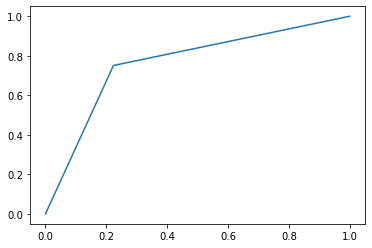

In [222]:
y_pred1 = log_regression.predict(x_train)
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred1)

#create ROC curve
plt.plot(fpr,tpr)

In [224]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, y_pred1)
auc

0.7636491782988379

In [225]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_valid, y_pred)
auc

0.7675682651293592